In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import torch as th

from ethos.constants import ADMISSION_STOKEN, DISCHARGE_STOKEN, PROJECT_DATA
from ethos.tokenize import SpecialToken, Vocabulary
from ethos.utils import load_data
from ethos.commands import tokenize_

warnings.filterwarnings("ignore")

dataset_dir = PROJECT_DATA / "tokenized_datasets"

vocab = Vocabulary(dataset_dir / "mimic_vocab_t763.pkl")
timeline_end_token = vocab.encode(SpecialToken.TIMELINE_END)
separator_tokens = th.from_numpy(vocab.encode(SpecialToken.SEPARATOR_NAMES).astype(np.int32))
f"Vocab size: {len(vocab):,}"


'Vocab size: 763'

SyntaxError: invalid syntax (3576865106.py, line 1)

In [27]:
dataset_path = dataset_dir / "mimic_test_timelines_p10.hdf5"
data = load_data(dataset_path, n_tokens=None)
times, tokens, patient_context, *_ = data.values()
print(f"Test dataset tokens: {len(times):,}, patients: {len(patient_context):,}")

Test dataset tokens: 63,652, patients: 10


In [28]:
n_patient = len(patient_context)
p_ctx_df = pd.DataFrame(vocab.decode(patient_context.numpy().reshape(-1)).reshape(n_patient, -1))
p_ctx_df[0].value_counts(dropna=False)

0
SEX_M    6
SEX_F    4
Name: count, dtype: int64

In [29]:
token_df = pd.DataFrame(tokens.numpy())
token_df = token_df.value_counts(dropna=False, normalize=True).reset_index()
token_df[0] = vocab.decode(token_df[0])
token_df.rename({0: "token"}, inplace=True, axis=1)
token_df

,token,proportion
0,_Q1,0.065984
1,ATC_4_A,0.061789
2,_Q2,0.035993
3,_Q3,0.033432
4,_Q4,0.032599
...,...,...
725,ICD_Disorders of vestibular function,0.000016
726,ICD_Unspecified dementia,0.000016
727,ICD_Cerebral infarction,0.000016
728,ICD_Unspecified lump in breast,0.000016


In [9]:
black_color = "#404040ff"
gray_color = "#b2b2b2ff"
sns.set(style="white", font='Liberation Serif', context="paper")
font_kwargs = dict(fontfamily='Liberation Serif', fontsize=14, fontweight='bold', color=black_color)


def autolabel(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f"{width:.2%}", (p.get_x() + width, p.get_y() + p.get_height() / 2 + 0.05),
                    ha='left', va='center', xytext=(1, 0), textcoords='offset points',
                    **font_kwargs)

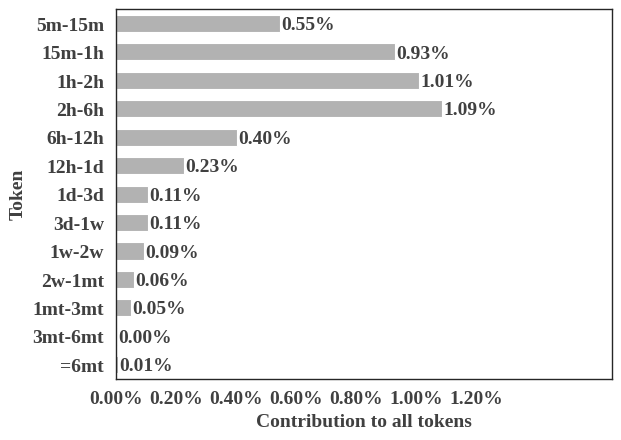

In [10]:
separator_freqs = token_df.loc[token_df.token.isin(SpecialToken.SEPARATOR_NAMES)]
ax = sns.barplot(data=separator_freqs, x="proportion", y="token",
                 order=SpecialToken.SEPARATOR_NAMES, color=gray_color,
                 width=0.6)

yticklabels = [t.get_text()[1:] for t in ax.get_yticklabels()]
ax.set_yticklabels(yticklabels, **font_kwargs)
ax.set_xticklabels([f"{t:.2%}" for t in ax.get_xticks()], **font_kwargs)
ax.set_xlabel("Contribution to all tokens", **font_kwargs)
ax.set_ylabel("Token", **font_kwargs)
ax.set_xlim(0, .0165)
autolabel(ax)

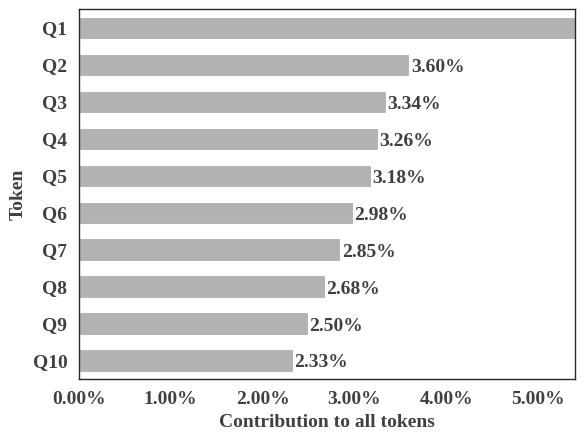

In [11]:
quantile_freqs = token_df.loc[token_df.token.isin(SpecialToken.DECILES)]
ax = sns.barplot(data=quantile_freqs, x="proportion", y="token",
                 order=SpecialToken.DECILES, color=gray_color,
                 width=0.6)

yticklabels = [t.get_text()[1:] for t in ax.get_yticklabels()]
ax.set_yticklabels(yticklabels, **font_kwargs)
ax.set_xticklabels([f"{t:.2%}" for t in ax.get_xticks()], **font_kwargs)
ax.set_xlabel("Contribution to all tokens", **font_kwargs)
ax.set_ylabel("Token", **font_kwargs)
ax.set_xlim(0, .054)
autolabel(ax)

In [12]:
print(SpecialToken.ALL)


['_5m-15m', '_15m-1h', '_1h-2h', '_2h-6h', '_6h-12h', '_12h-1d', '_1d-3d', '_3d-1w', '_1w-2w', '_2w-1mt', '_1mt-3mt', '_3mt-6mt', '_=6mt', '_TIMELINE_END', '_DEATH', '_<5', '_5-10y', '_10-15y', '_15-20y', '_20-25y', '_25-30y', '_30-35y', '_35-40y', '_40-45y', '_45-50y', '_50-55y', '_55-60y', '_60-65y', '_65-70y', '_70-75y', '_75-80y', '_80-85y', '_85-90y', '_90-95y', '_95-100y', '_>100', '_Q1', '_Q2', '_Q3', '_Q4', '_Q5', '_Q6', '_Q7', '_Q8', '_Q9', '_Q10']


In [13]:
print(token_df.columns)  # Ensure 'token' and 'proportion' exist
print(token_df.head())   # Inspect the first few rows


Index(['token', 'proportion'], dtype='object')
     token  proportion
0      _Q1    0.065984
1  ATC_4_A    0.061789
2      _Q2    0.035993
3      _Q3    0.033432
4      _Q4    0.032599


In [15]:
print(token_df.head())


     token  proportion
0      _Q1    0.065984
1  ATC_4_A    0.061789
2      _Q2    0.035993
3      _Q3    0.033432
4      _Q4    0.032599


                         token  proportion
1                      ATC_4_A    0.061789
11  ATC_drugs used in diabetes    0.017564
12                     ATC_4_B    0.012993
16         LAB_Potassium_mEq/L    0.009096
17        LAB_Creatinine_mg/dL    0.008986
18            LAB_Sodium_mEq/L    0.008939
19     LAB_Urea Nitrogen_mg/dL    0.008719
20          LAB_Chloride_mEq/L    0.008688
21     LAB_Platelet Count_K/uL    0.008625
22           LAB_Glucose_mg/dL    0.008546
23         LAB_Anion Gap_mEq/L    0.008484
24       LAB_Bicarbonate_mEq/L    0.008484
25         LAB_Hemoglobin_g/dL    0.008436
26            LAB_Hematocrit_%    0.008327
27                  LAB_MCV_fL    0.008248
28  LAB_White Blood Cells_K/uL    0.008248
29                  LAB_MCH_pg    0.008248
30                   LAB_RDW_%    0.008248
31    LAB_Red Blood Cells_m/uL    0.008248
32              ATC_SUFFIX_A01    0.007918


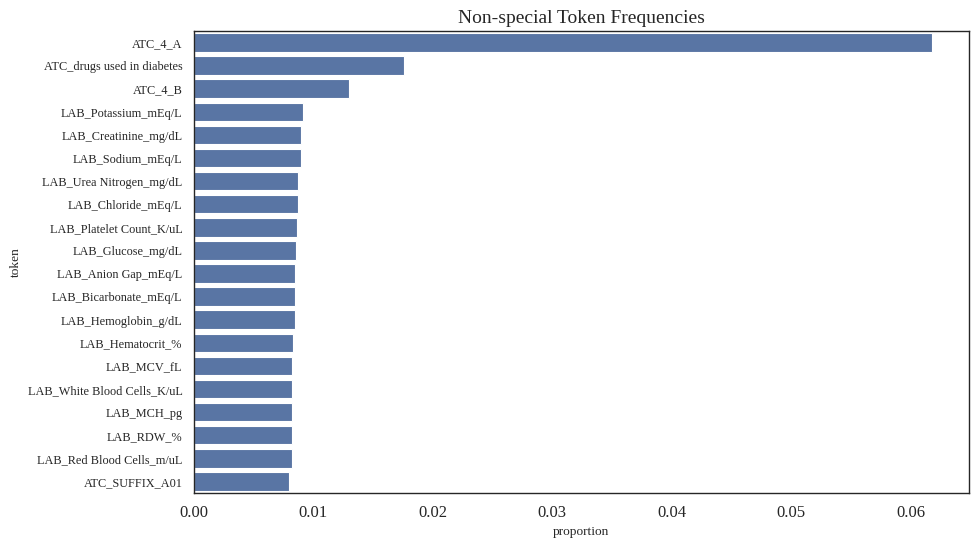

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove NaN values from the token column
token_df = token_df.dropna(subset=["token"])

# Ensure SpecialToken.ALL is filtering correctly
non_special_freqs_top20 = token_df.loc[~token_df.token.isin(SpecialToken.ALL)].head(20)
print(non_special_freqs_top20)


# Ensure the DataFrame is not empty
if not non_special_freqs_top20.empty:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the bar plot
    sns.barplot(data=non_special_freqs_top20, y="token", x="proportion", ax=ax)

    # Modify x-tick labels properly
    labels = ax.get_xticklabels()
    for t in labels:
        t.set_text(t.get_text()[:15].lower())
    ax.set_xticklabels(labels, rotation=0, fontsize=12)

    ax.set_title("Non-special Token Frequencies", fontsize=14)
    
    plt.show()
else:
    print("⚠️ No valid data to plot. Check token filtering!")


Text(0.5, 1.0, 'Non-special token frequencies')

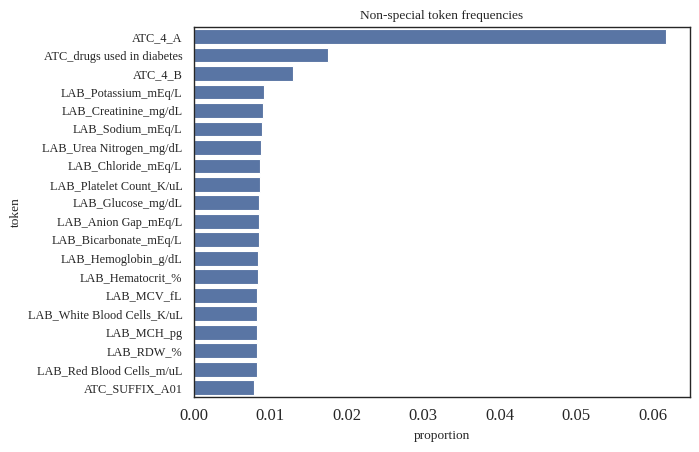

In [22]:
non_special_freqs_top20 = token_df.loc[~token_df.token.isin(SpecialToken.ALL)].head(20)
ax = sns.barplot(data=non_special_freqs_top20, y="token", x="proportion")
labels = ax.get_xticklabels()
for t in labels:
    t.set_text(t.get_text()[:15].lower())
ax.set_xticklabels(labels, rotation=0, fontsize=12)
ax.set_title("Non-special token frequencies")

In [23]:
separator_mask = th.isin(tokens, separator_tokens)
tokens_nosep = tokens[~separator_mask]
times_nosep = times[~separator_mask]
f"Tokens excluding separators: {len(times_nosep):,} ({len(times_nosep) / len(times):.2%})"

'Tokens excluding separators: 60,701 (95.36%)'

In [24]:
timeline_end_token = vocab.encode(SpecialToken.TIMELINE_END)
deltas = times_nosep[1:] - times_nosep[:-1]
deltas = deltas[tokens_nosep[:-1] != timeline_end_token]
deltas = deltas[deltas != 0]
f"Time deltas: {len(deltas):,}"

'Time deltas: 3,156'